# **House Prices – Regularized Linear Models**
### *Understanding the Impact of Regularization on Linear Models (Ridge, Lasso, ElasticNet)*

---
# 📚 Table of Contents

1. [Introduction](#introduction)
2. [Dataset Description](#dataset-description)
3. [Feature Dictionary](#feature-dictionary)
4. [Data Cleaning](#data-cleaning)
5. [Exploratory Data Analysis & Feature Engineering](#eda--feature-engineering)
6. [Feature Selection](#feature-selection)
7. [Model Building](#model-building)
8. [Model Evaluation](#model-evaluation)
9. [Testing on the Holdout Test Set](#testing-on-the-holdout-test-set)
10. [Conclusion](#conclusion)
---

## **Introduction**

The dataset used in this project is the **Ames Housing Dataset**, which contains detailed information about residential property sales in Ames, Iowa (USA). It includes **79 explanatory variables** describing quality, condition, and structural characteristics of each house, along with the target variable **SalePrice**.

The goal of this notebook is to explore how **regularization techniques** influence linear regression models. More specifically, we study how:

- **Ridge** improves model stability and reduces sensitivity to feature collinearity,  
- **Lasso** performs feature selection and enhances interpretability,  
- **ElasticNet** combines both behaviours,  
- and how these models compare to a standard **Linear Regression baseline**.

The objective is not to build the most powerful predictive model, but to analyze how regularization affects **performance**, **robustness**, and **interpretability**.

---

Below is the complete description of the dataset features.

## **Feature Dictionary**

| Feature | Description |
|--------|-------------|
| MSSubClass | Type of dwelling involved in the sale |
| MSZoning | General zoning classification |
| LotFrontage | Linear feet of street connected to property |
| LotArea | Lot size in square feet |
| Street | Type of road access |
| Alley | Alley access |
| LotShape | Shape of the property |
| LandContour | Flatness of the property |
| Utilities | Utilities available |
| LotConfig | Property configuration |
| LandSlope | Slope of property |
| Neighborhood | Location within Ames |
| Condition1 | Proximity to roads/railroad |
| Condition2 | Proximity to roads/railroad (2nd exposure) |
| BldgType | Type of dwelling |
| HouseStyle | Style of house |
| OverallQual | Overall material and finish quality |
| OverallCond | Overall condition |
| YearBuilt | Construction year |
| YearRemodAdd | Remodel year |
| RoofStyle | Roof type |
| RoofMatl | Roof material |
| Exterior1st | Exterior covering |
| Exterior2nd | Exterior covering (2nd) |
| MasVnrType | Masonry veneer type |
| MasVnrArea | Masonry veneer area |
| ExterQual | Exterior quality |
| ExterCond | Exterior condition |
| Foundation | Foundation type |
| BsmtQual | Basement height |
| BsmtCond | Basement condition |
| BsmtExposure | Basement exposure |
| BsmtFinType1 | Basement finish type 1 |
| BsmtFinSF1 | Finished basement area 1 |
| BsmtFinType2 | Basement finish type 2 |
| BsmtFinSF2 | Finished basement area 2 |
| BsmtUnfSF | Unfinished basement area |
| TotalBsmtSF | Total basement area |
| Heating | Heating system |
| HeatingQC | Heating quality |
| CentralAir | Air conditioning |
| Electrical | Electrical system |
| 1stFlrSF | First floor square feet |
| 2ndFlrSF | Second floor square feet |
| LowQualFinSF | Low-quality finished area |
| GrLivArea | Above-ground living area |
| BsmtFullBath | Basement full bathrooms |
| BsmtHalfBath | Basement half bathrooms |
| FullBath | Full bathrooms |
| HalfBath | Half bathrooms |
| BedroomAbvGr | Bedrooms above ground |
| KitchenAbvGr | Kitchens above ground |
| KitchenQual | Kitchen quality |
| TotRmsAbvGrd | Total rooms above ground |
| Functional | Functionality rating |
| Fireplaces | Number of fireplaces |
| FireplaceQu | Fireplace quality |
| GarageType | Garage location |
| GarageFinish | Garage finish |
| GarageCars | Garage capacity (cars) |
| GarageArea | Garage area |
| GarageQual | Garage quality |
| GarageCond | Garage condition |
| PavedDrive | Paved driveway |
| WoodDeckSF | Wood deck area |
| OpenPorchSF | Open porch area |
| EnclosedPorch | Enclosed porch area |
| 3SsnPorch | 3-season porch area |
| ScreenPorch | Screen porch area |
| PoolArea | Pool area |
| PoolQC | Pool quality |
| Fence | Fence quality |
| MiscFeature | Miscellaneous features |
| MiscVal | Miscellaneous value |
| MoSold | Month sold |
| YrSold | Year sold |
| SaleType | Type of sale |
| SaleCondition | Condition of sale |
| SalePrice | **Target variable: house sale price** |


## **Data Cleaning**

<a id="data-cleaning"></a>

We will first import all the libraries we need for this project :

In [202]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import normaltest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import DataConversionWarning

We import the train set used for the model building :

In [190]:
df = pd.read_csv(r'C:\Users\Saker_Maiyar\Downloads\house-prices-advanced-regression-techniques\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


The train set contains 1460 rows and 81 columns. Let's see the columns more in detail :

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Most of the data set consists of integer and object features (only 3 float features).

Wa can now check the missing values in each column :

### Missing Values

In [192]:
df_0 = df.isnull().sum()[df.isnull().sum() != 0].reset_index()
df_0

,index,0
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,872
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


There are 18 features with missing values. We first deal with the columns which have very few missing values : MasVnrArea and Electrical. 

We want to know whether we replace the missing values of MasVnrArea by its median or its mean. 
Let's plot distribution plot and the boxplot of MasVnrArea to see how are the values distributed :

Text(0.5, 0.98, 'Masonry veneer area Distribution')

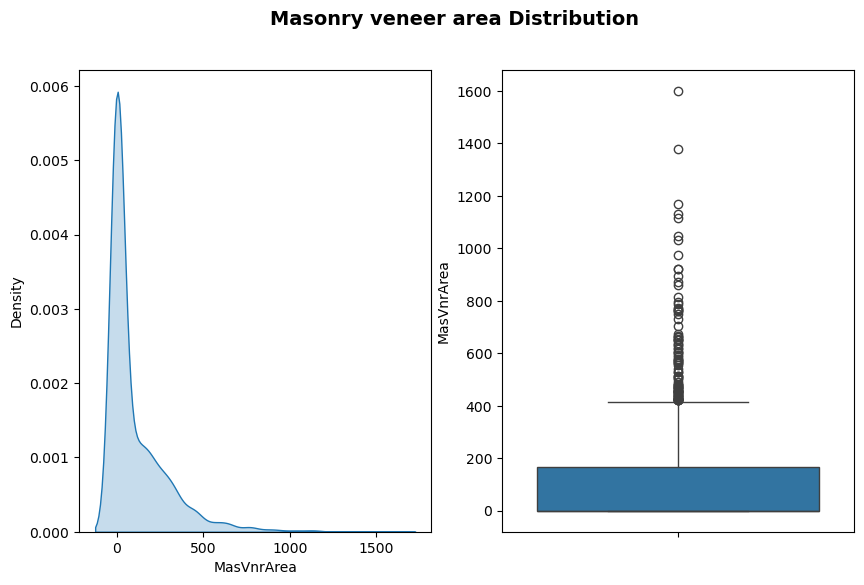

In [193]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
sns.kdeplot(x='MasVnrArea', fill=True, data=df, ax=ax[0])
sns.boxplot(y='MasVnrArea', data=df, ax=ax[1])
fig.suptitle('Masonry veneer area Distribution', fontsize=14, fontweight='bold')

The distribution is highly right-skewed with many houses having 0 masonry veneer and a few very large values (strong outliers). In such a skewed distribution, the mean is pulled up by those extreme values and is not representative of a “typical” house.
The median is much more robust to outliers and better reflects the central tendency of this variable, so it provides a more realistic replacement for the missing MasVnrArea values.

In [194]:
MasVnrArea_median = np.median(df['MasVnrArea'])
df['MasVnrArea'] = df['MasVnrArea'].fillna(MasVnrArea_median)

For Electrical we can replace the only missing value by the Electrical mode (the most frequent value) as it is a categorical variable.

In [96]:
df['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [97]:
df['Electrical']=df['Electrical'].fillna('SBrkr')

We can verify there are no missing values for MasVnrArea and Electrical anymore :

In [98]:
df_0 = df.isnull().sum()[df.isnull().sum() != 0].reset_index()
df_0

,index,0
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,872
3,BsmtQual,37
4,BsmtCond,37
5,BsmtExposure,38
6,BsmtFinType1,37
7,BsmtFinType2,38
8,FireplaceQu,690
9,GarageType,81


I decided to deal all the other missing values by replacing them by 'None'. However even if the idea sounds good, I forgot to separate the categorical and the numerical features. Why is that a problem ? Well, when I wanted later to scale the numerical variables I had an issue : the numerical features which had missing values turned into object features because of the addition of 'None'.

I had to fix this problem later in the project. 

In [99]:
missing = df_0['index'].tolist()
missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [100]:
for col in missing :
    df[col] = df[col].fillna('None')
df.isnull().sum()[df.isnull().sum() != 0].reset_index()

,index,0


There are no missing values left.

---

### Useless/Unbalanced Features :

We focus know on which features we decide to drop. In order to see the effects of regularization, we will not deal multicolinearity and only focus on the features that are useless for the target prediction, or features that are unbalanced and can create bias.

If we first take a look on the features, it seems obvious that 'Id' has no utility here. It is not an explanatory feature and would only put some noise while building our model. We can drop it :

In [101]:
df=df.drop('Id', axis=1)

We know look for the features that consist of only 1 or 2 different values :

In [102]:
for col in df.columns :
    if df[col].nunique() < 3 :
        print(df[col].value_counts())

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
CentralAir
Y    1365
N      95
Name: count, dtype: int64


We observe that Street and Utilities are very unbalanced, which can have a negative influence on the model fitting, as it can create bias. We can drop those features. As of CentralAir, I think that we can keep it because even if it is unbalanced, there are enough values for the second category. I decided to keep it.

In [103]:
df=df.drop(['Street','Utilities'], axis=1)

We know check for unbalanced features that consists of more than 2 different categories and have one category with more than 97% of the values :

In [104]:
dominant_cols = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq > 0.97:
        dominant_cols.append(df[col].value_counts())

dominant_cols

[Condition2
 Norm      1445
 Feedr        6
 Artery       2
 RRNn         2
 PosN         2
 PosA         1
 RRAn         1
 RRAe         1
 Name: count, dtype: int64,
 RoofMatl
 CompShg    1434
 Tar&Grv      11
 WdShngl       6
 WdShake       5
 Metal         1
 Membran       1
 Roll          1
 ClyTile       1
 Name: count, dtype: int64,
 Heating
 GasA     1428
 GasW       18
 Grav        7
 Wall        4
 OthW        2
 Floor       1
 Name: count, dtype: int64,
 LowQualFinSF
 0      1434
 80        3
 360       2
 513       1
 528       1
 572       1
 144       1
 234       1
 392       1
 371       1
 420       1
 390       1
 473       1
 156       1
 515       1
 53        1
 232       1
 481       1
 120       1
 514       1
 397       1
 479       1
 205       1
 384       1
 Name: count, dtype: int64,
 3SsnPorch
 0      1436
 168       3
 180       2
 144       2
 216       2
 130       1
 320       1
 407       1
 508       1
 238       1
 245       1
 140       1
 196      

We must be careful here : there are some very unbalanced features that actually give a real indication of the price, such as PoolArea. Indeed even if there are few houses with a pool, I expect that when it happens, it significantly increases the Sale Price value. 

We can create the boxplots for each of these features to see if the Sale Price median changes over the different categories (I didn't plot PoolQC since PoolArea is highly correlated with it) :

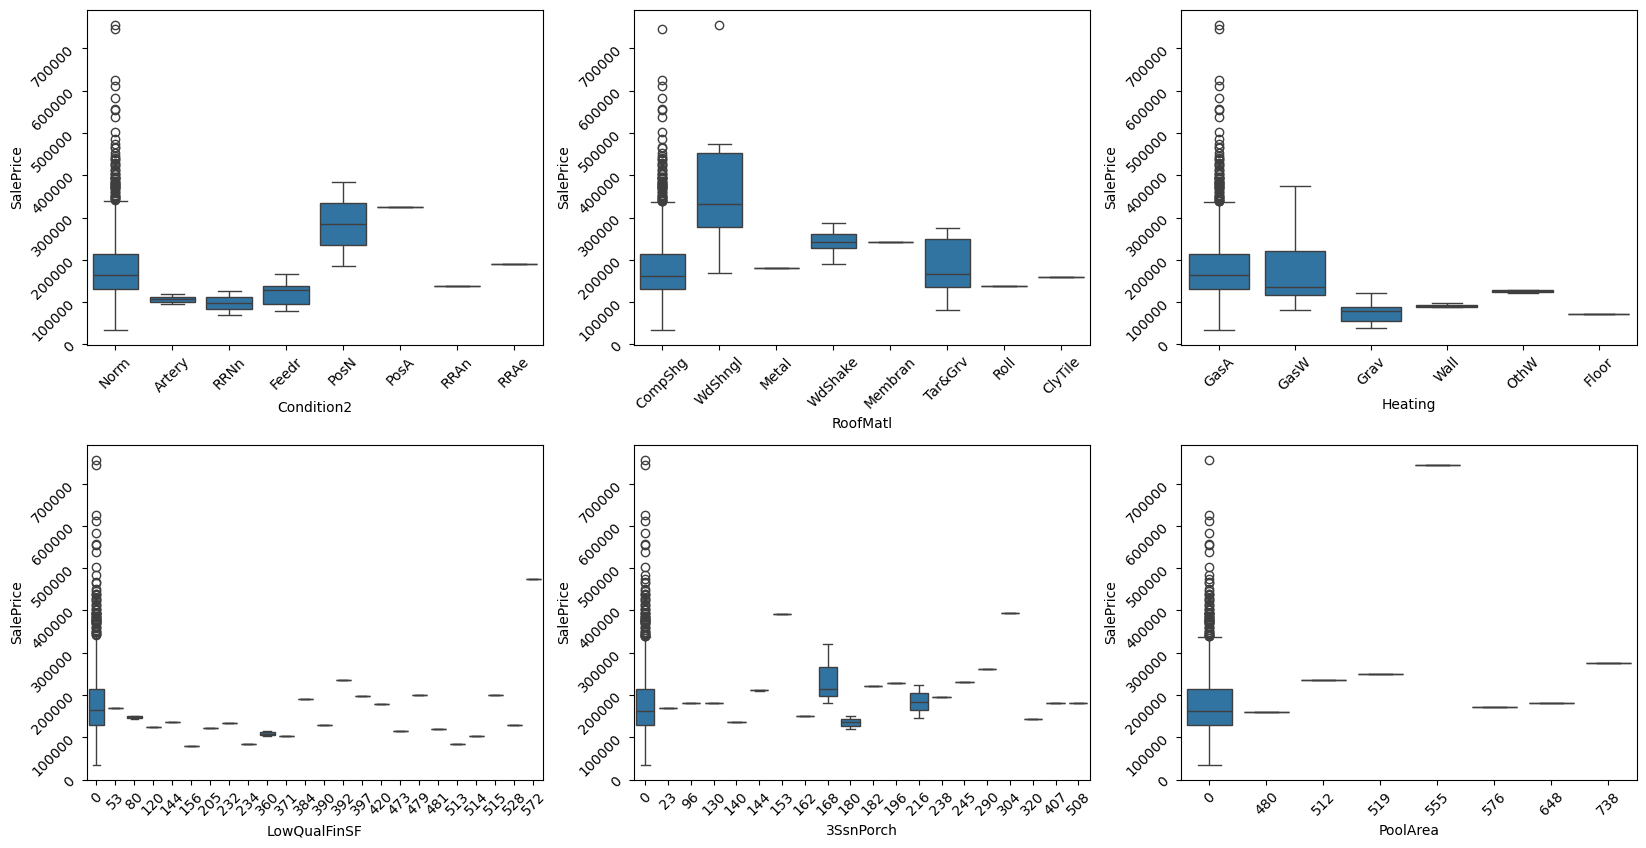

In [105]:
fig,axes = plt.subplots(2,3, figsize=(20,10))
for (i,j),col in zip([(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)],['Condition2','RoofMatl','Heating','LowQualFinSF','3SsnPorch','PoolArea']) :
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axes[i,j])
    axes[i,j].tick_params(rotation=45)
fig.subplots_adjust(hspace=0.3)

Let's summarize what we see :

- Condition2 : No big changes in the Sale Prices values (only for PosN category but there is not enough observations to say for sure that PosN increases the price)
- RoofMatl : Sames as Condition2, there aren't big changes in the Sale Prices values except for the WdShngl category (not enough observations though)
- Heating : The median of the Sale Prices doesn't change very much

These features are highly unbalanced, and the other "little" categories don't change the Sale Prices very much, so we can easily drop them from the df since we can consider they have no utility in our project :

In [106]:
df=df.drop(['Condition2','RoofMatl','Heating'], axis=1)

We can see that for the 3 remaining features, the Sale Prices median can significantly change fot the "little" categories :
- LowQualFinSF : The Sale Prices median of the unbalanced categories seem to be lower than the main category, except for some categories. We can conclude that this feature can have an influence on the Sale Price value. We can keep it
- 3SSn porch : The Sale Prices median of the unbalanced categories seem to be globaly higher than the main category (0). We keep this feature too.
- PoolArea : as expected, the Sale Price of the minority of Houses which do have a pool is higher than the houses which don't. We keep this feature too as it can give an important idea of the Sale Price.

For these features, we create a new binary column, with two values : 0 (main category), or 1 (unbalanced category). I chose to keep binary clumns instead of the categorical columns in order not to encode them later by creating a lot of dummies with very little information and utility. It is easier this way.

In [107]:
df['LowQualFinSF_bin'] = (df['LowQualFinSF']>0).astype(int)
df['Has3SsnPorch'] = (df['3SsnPorch']>0).astype(int)
df['HasPool'] = (df['PoolArea']> 0).astype(int)
df[['LowQualFinSF_bin','Has3SsnPorch','HasPool']]

,LowQualFinSF_bin,Has3SsnPorch,HasPool
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1455,0,0,0
1456,0,0,0
1457,0,0,0
1458,0,0,0


As we keep the new created features, we can drop the old ones :

In [108]:
df=df.drop(['LowQualFinSF','3SsnPorch','PoolArea','PoolQC'], axis=1)

---

## **Exploratory Data Analysis**

### Analysis of the target : 

We start by cerating an overview of the target distribution (Sale Price) :

---

Text(0.5, 0, 'Sale Price')

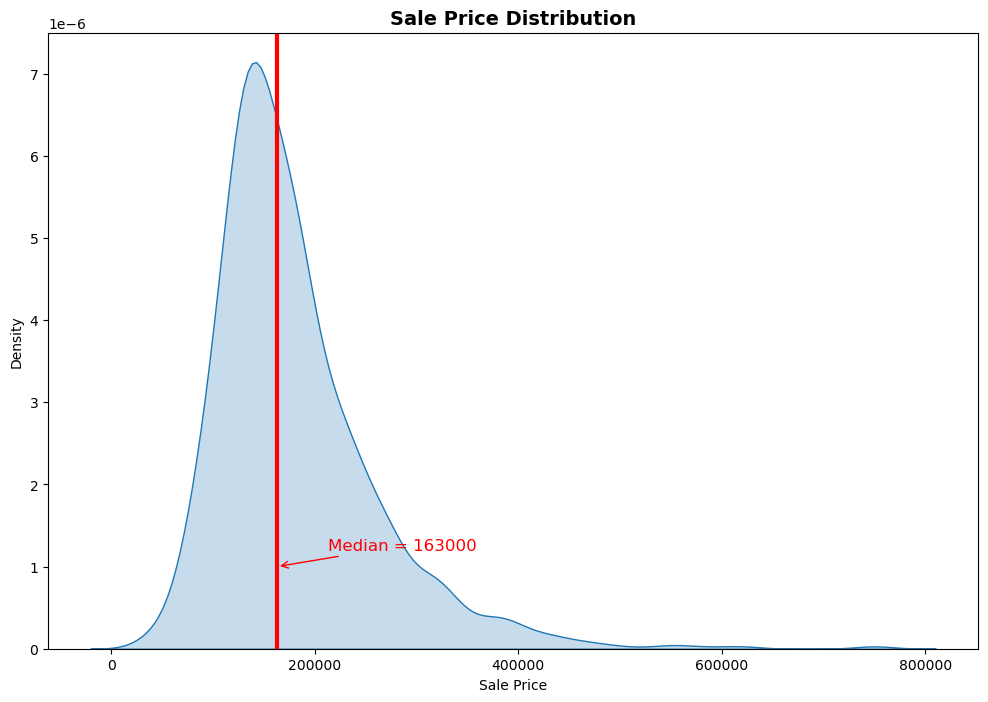

In [109]:
fig,ax=plt.subplots(figsize=(12,8))
sns.kdeplot(x='SalePrice', fill=True, data=df)
price_median = statistics.median(df['SalePrice'])
ax.axvline(x=price_median, color='red', linewidth=3)
ax.annotate(
    f"Median = {price_median:.0f}",
    xy=(price_median, 1e-6),          # point à annoter (sur la courbe)
    xytext=(price_median + 50000, 1.2e-6),  # position du texte
    arrowprops=dict(arrowstyle="->", color="red"),
    color="red",
    fontsize=12,
    ha="left"
)
ax.set_title('Sale Price Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Sale Price')

We can see that the distribution is skewed to the right. Indeed, few houses have an high Price. It explains this observation. It is even more obvious if we create the boxplot :

<Axes: ylabel='SalePrice'>

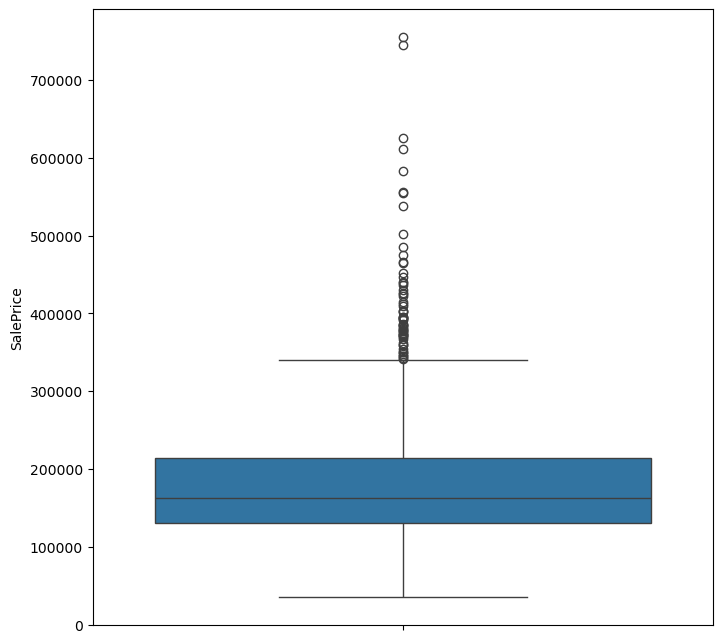

In [110]:
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(y='SalePrice', data=df)

We can see that there are a lot of outliers that increase the average House Price. We will deal with this skewness by applying the log function to the target later.

Let's now see the correlation of Pearson between the numerical features and the target :

Text(0.5, 1.0, 'Sale Price Correlation')

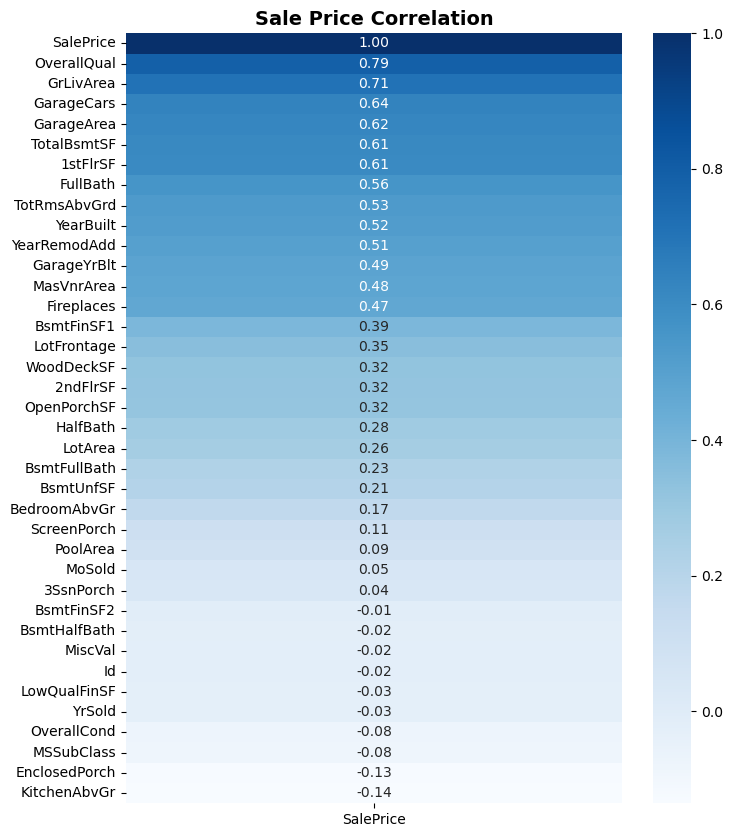

In [199]:
corr = df.select_dtypes(include=['int','float']).corr()['SalePrice'].sort_values(ascending=False).to_frame()
fig, ax=plt.subplots(figsize=(8,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
ax.set_title('Sale Price Correlation', fontsize=14, fontweight='bold')

The Overall House Quality, the Above ground Living Area and the number of cars in the garage are the feature that most increase the House Price. We can observe that there are a lot of multicolinearity between the features : GarageCars and GarageAreas for example. 

We can also observe that there are a lot of features that don't really have an influence on the House, like the the Basement Half Bathrooms for example (-0.02).

We could decide to drop the features that are highly correlated with other features, but we will keep them so we can see the effects of the regularisation (Lasso should be droping the lower coefficients to 0, and Ridge should control the multicolinearity).

### Analysis of the numerical features :

We will create som insights of the most correlated features with the Sale Price:

Text(0, 0.5, 'Sale Price')

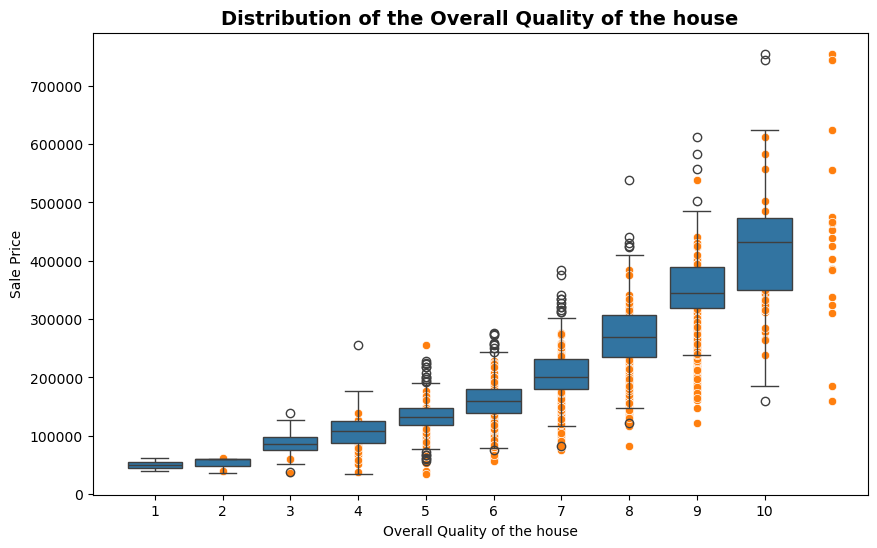

In [196]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(y='SalePrice', x='OverallQual', data=df, ax=ax)
sns.scatterplot(y='SalePrice', x='OverallQual', data=df, ax=ax)
ax.set_title('Distribution of the Overall Quality of the house', fontsize=14, fontweight='bold')
ax.set_xlabel('Overall Quality of the house')
ax.set_ylabel('Sale Price')

As we would expect, the better the Overall Quality of the house, the higher the Sale Price.

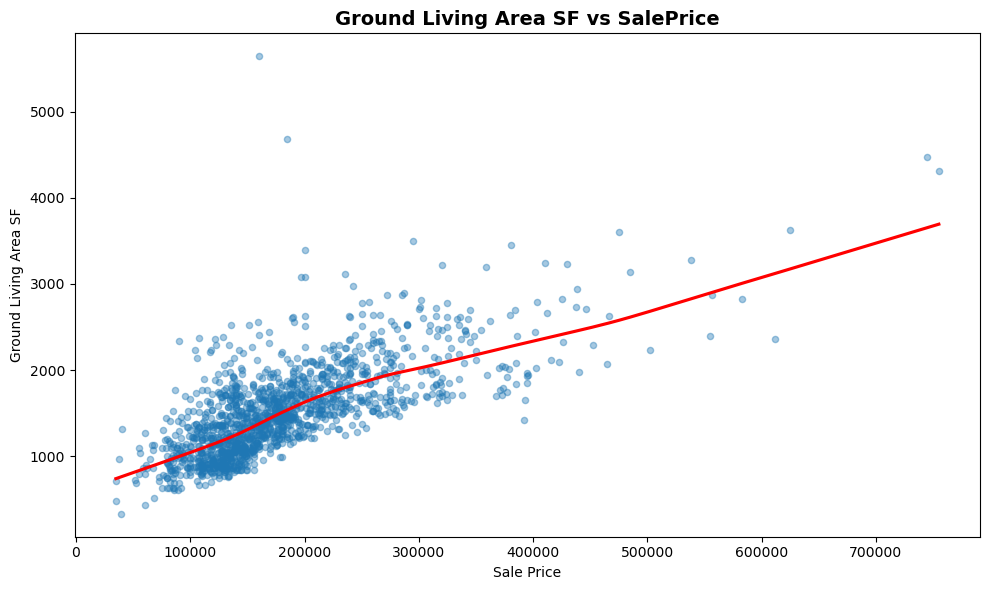

In [113]:
fig,ax=plt.subplots(figsize=(10,6))
sns.regplot(
    x='SalePrice',
    y='GrLivArea',
    data=df,
    lowess=True,
    scatter_kws={'alpha':0.4, 's':20},
    line_kws={'color':'red'},
    ax=ax
)

ax.set_title('Ground Living Area SF vs SalePrice',fontsize=14, fontweight='bold')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Ground Living Area SF')
plt.tight_layout()
plt.show()

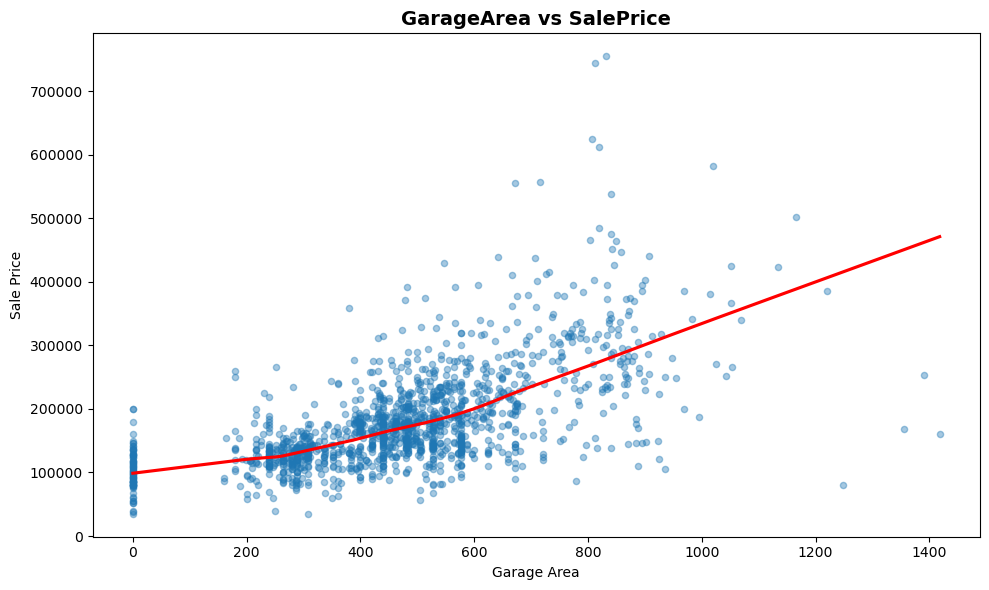

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(
    x='GarageArea',
    y='SalePrice',
    data=df,
    lowess=True,
    scatter_kws={'alpha':0.4, 's':20},
    line_kws={'color':'red'},
    ax=ax
)

ax.set_title('GarageArea vs SalePrice',fontsize=14, fontweight='bold')
ax.set_xlabel('Garage Area')
ax.set_ylabel('Sale Price')
plt.tight_layout()
plt.show()


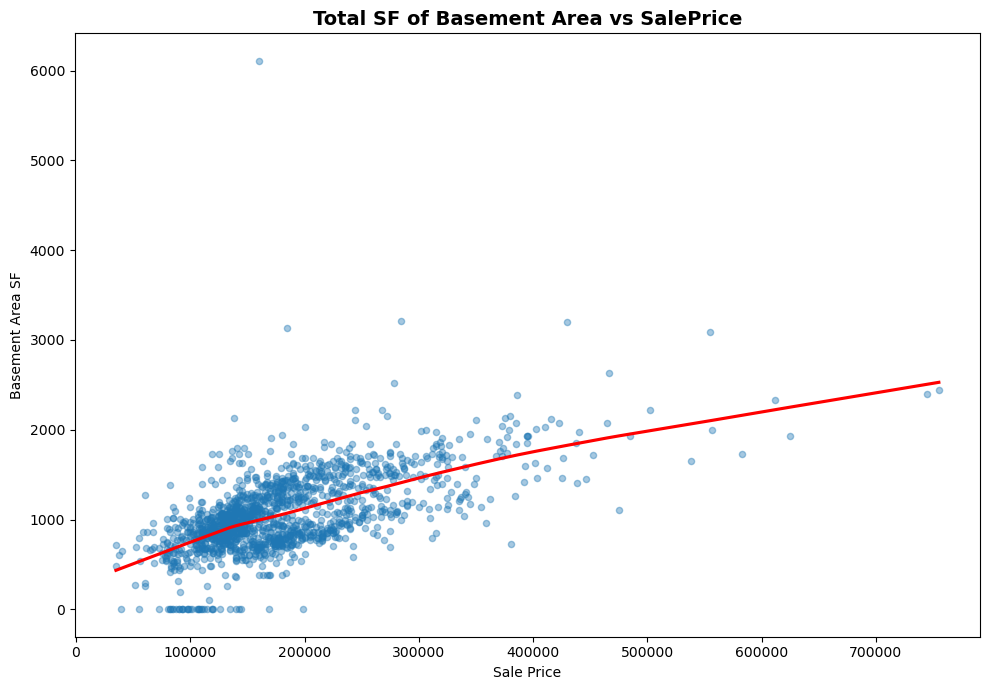

In [115]:
fig,ax=plt.subplots(figsize=(10,7))
sns.regplot(x='SalePrice', y='TotalBsmtSF', lowess=True,
                scatter_kws={'alpha':0.4, 's':20},
                line_kws={'color':'red'},
            data=df)
ax.set_title('Total SF of Basement Area vs SalePrice',fontsize=14, fontweight='bold')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Basement Area SF')
plt.tight_layout()
plt.show()

For these features, the trend line has a positive slope, meaning that increasing the value of this feature is associated with higher house prices. It explains the high positive correlation we observed between those features and the Sale Price. Indeed the higher the Ground Living Area and the Basement Area, the higher the Sale Price. Moreover, the more space there is in the garage, the higher the house price tends to be. More generally, this indicates that having a garage is a factor that increases the value of a house. This is visible on the trend line: when the Garage Area is 0 (meaning no garage), the corresponding SalePrice values are lower than when the Garage Area is greater than 0 (presence of a garage).

Now I want to compare 2 features : YearBuilt (Year of Construction) and YearRemodAdd (Year of Remodeling of the House if remodeled, else the Year of Construction) :

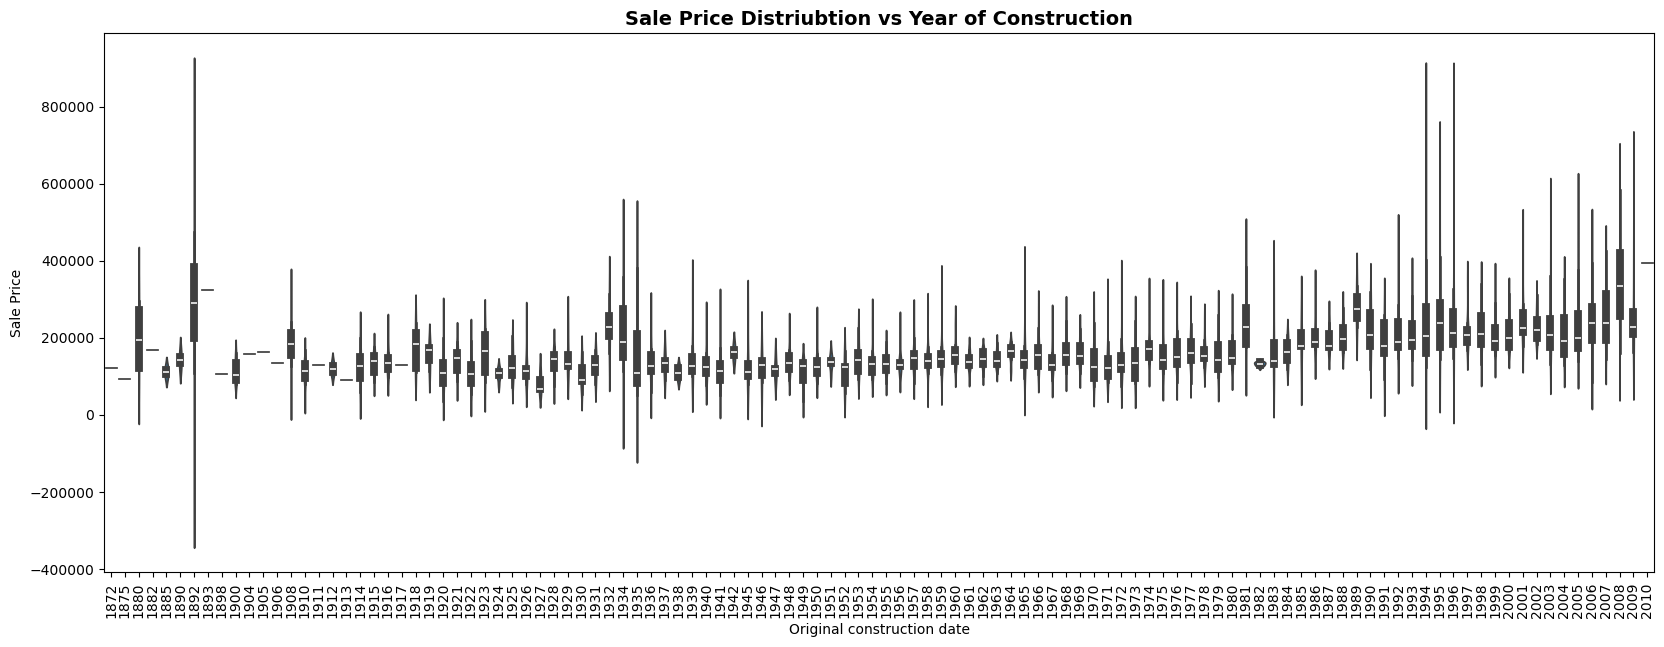

In [116]:
fig,ax=plt.subplots(figsize=(20,7))
sns.violinplot(x='YearBuilt', y='SalePrice', data=df)
ax.set_title('Sale Price Distriubtion vs Year of Construction', fontsize=14, fontweight='bold')
ax.set_xlabel('Original construction date')
ax.set_ylabel('Sale Price')
plt.xticks(rotation=90);

There is a slight increase in the median sale price over the years, suggesting that the construction year of the house has a positive influence on price.
However, the most noticeable pattern is the increase in price variance over time, especially from the 1990s onward.

Since the median price does not change dramatically, one possible explanation is that older houses may have been renovated, which could reduce the price gap between older and newer constructions.

To investigate this, we create a new binary variable IsRemodeled taking the values:

- True → the house has been remodeled

- False → the house has not been remodeled

This will allow us to analyze the impact of renovation on sale price.

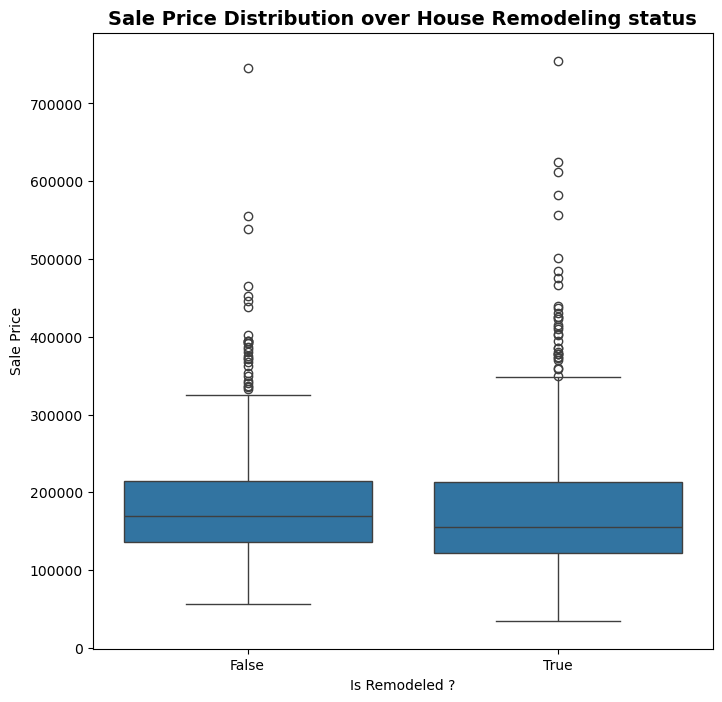

In [117]:
df2 = df.copy()
df2['IsRemodeled'] = (df2['YearBuilt'] != df2['YearRemodAdd']).astype(int)
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(y='SalePrice', x='IsRemodeled', data=df2, ax=ax)
ax.set_title('Sale Price Distribution over House Remodeling status', fontsize=14, fontweight='bold')
ax.set_xlabel('Is Remodeled ?')
ax.set_ylabel('Sale Price')
ax.set_xticks([0,1])
ax.set_xticklabels(['False', 'True']);

We observe that the medians for both categories are very close, although non-remodeled houses surprisingly show a slightly higher median price.
This suggests two things:

- Renovation likely serves to compensate for the natural price depreciation of older houses, bringing their value closer to the median price of newer constructions. This could explain why we do not see a strong increase in median prices across construction years.

- Non-remodeled houses are likely to be newly built, which implies that a brand-new house tends to have a higher value than a remodeled one.

- The median for remodeled houses remains slightly lower because the term “remodeling” probably includes minor renovations that do not significantly increase the value of the property. In other words, not all remodels are major upgrades, so the impact on price can be limited.

Let's focus know on the categorical variables. As we can not simply calculate the correlation between them and the Sale Price, I selected features that seem important to me if I would buy a House :

---

### Analysis of categorical features :

- MsZoning Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

  

- Neighborhood

- HouseStyle : Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

- Kitchen Quality : I think it's correlated with the Overall House Quality but it is an important hygiene-related criterion that can influence a buyer’s intention to purchase a house, and therefore its price :

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Text(0.5, 1.0, 'General Zoning Classification vs Sale Price')

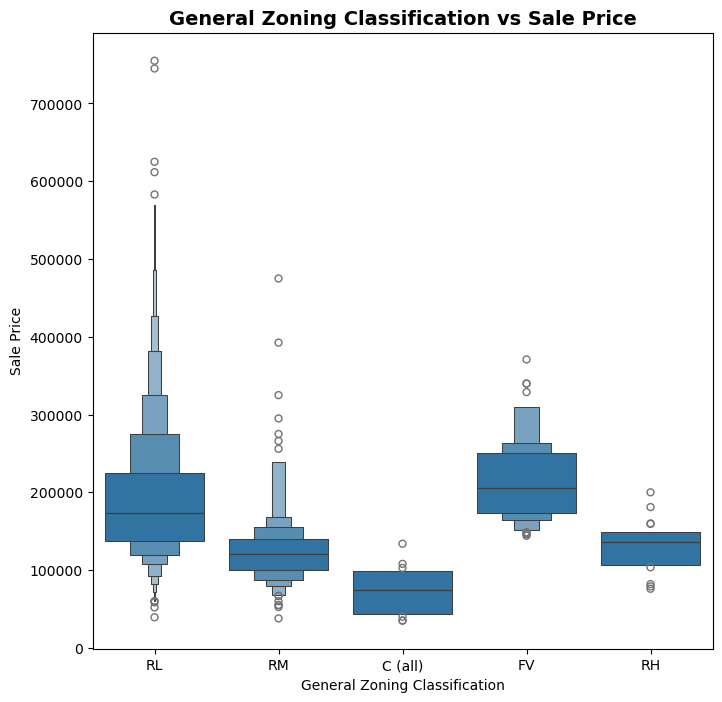

In [200]:
fig,ax = plt.subplots(figsize=(8,8))
sns.boxenplot(y='SalePrice',x='MSZoning', data=df)
ax.set_ylabel('Sale Price')
ax.set_xlabel('General Zoning Classification')
ax.set_title('General Zoning Classification vs Sale Price', fontsize=14, fontweight='bold')

Most houses fall under the Residential Low Density category, which shows a very large price variance.
This can be explained by the fact that low-density residential zones often include a wide spectrum of properties: small older houses, large renovated homes, premium houses with big lots, and everything in between. Because the zoning rules are relatively permissive, the quality, size, and age of the homes vary widely, which naturally increases the spread in prices.

The zone with the lowest median price is Commercial.
This makes sense because houses located in commercial areas are surrounded by businesses, traffic, noise, and less residential-oriented infrastructure, which typically makes them less attractive for family living. As a result, their market value tends to be lower.

Conversely, the zone with the highest median price is Floating Village Residential.
This category likely includes unique, high-end properties located in special waterfront or premium recreational areas, which are usually more desirable and therefore command higher prices.

Overall, the General Zoning Classification clearly influences house prices, with each zone reflecting different levels of desirability, environmental conditions, and types of properties.

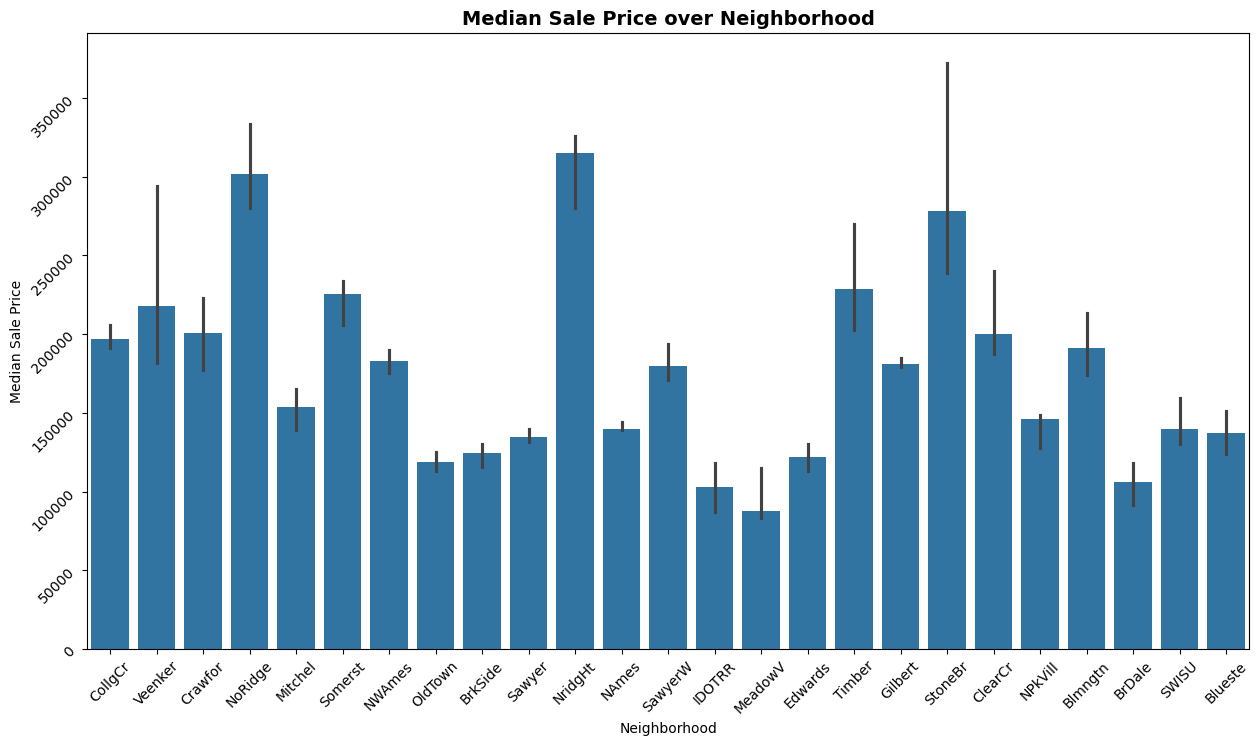

In [119]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Neighborhood', y='SalePrice', data=df, estimator=np.median)
ax.set_ylabel('Median Sale Price')
ax.set_title('Median Sale Price over Neighborhood', fontsize=14, fontweight='bold')
ax.tick_params(rotation=45)

The distribution of median sale prices across neighborhoods shows strong heterogeneity, indicating that location is one of the most influential factors in determining house value.

High-value neighborhoods such as NoRidge, Nridght, StoneBr, and Timber exhibit significantly higher median prices.
These areas are likely associated with better infrastructure, safer environments, newer or larger properties, and overall higher socioeconomic profiles, which naturally increases desirability and therefore price.

Low-value neighborhoods, such as IDOTRR, MeadowV, OldTown, or BrDale, show much lower median prices.
This can be explained by older housing stock, lower demand, smaller lot sizes, or proximity to industrial or less attractive areas, which typically reduces market value.

Some neighborhoods, such as Veenker or StoneBr show large variance in prices.
This large spread may reflect diverse types of properties within the same neighborhood (older homes, newly built houses, remodeled ones, premium houses on large lots, etc.).
When a neighborhood contains both affordable and high-end homes, the variability in sale prices naturally increases.

Overall, the Neighborhood variable has a strong impact on house prices.
It captures several latent attributes such as school quality, local amenities, perceived prestige, safety, and environmental quality which explains why the median values differ so significantly from one neighborhood to another.

Text(0.5, 1.0, 'Sale Price over House Style')

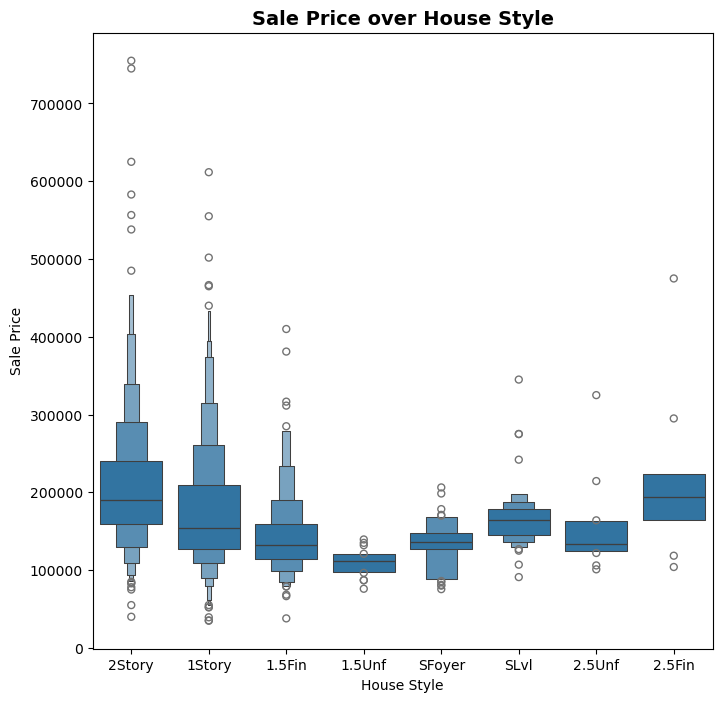

In [201]:
fig,ax = plt.subplots(figsize=(8,8))
sns.boxenplot(y='SalePrice',x='HouseStyle', data=df)
ax.set_ylabel('Sale Price')
ax.set_xlabel('House Style')
ax.set_title('Sale Price over House Style', fontsize=14, fontweight='bold')

The median sale prices do not change much across the different HouseStyle categories.
However, some styles show much higher variance than others.

2Story, 1Story, and 1.5Fin have large variances, meaning these styles include very different types of houses — some cheap, some very expensive. This suggests that these categories mix homes of different sizes, ages, and quality levels.

Styles like 1.5Unf, SFoyer, and SLvl have lower median prices and low variance. Houses in these categories are more similar to each other, usually smaller or less high-end, which explains the lower prices.

2.5Fin shows a higher median price, meaning this style tends to be more expensive on average.

Overall, HouseStyle does not change the median price very much, but it affects how spread out the prices are. Some styles include many different types of houses, while others are more uniform.

Text(0.5, 1.0, 'Sale Price vs Kitchen Quality')

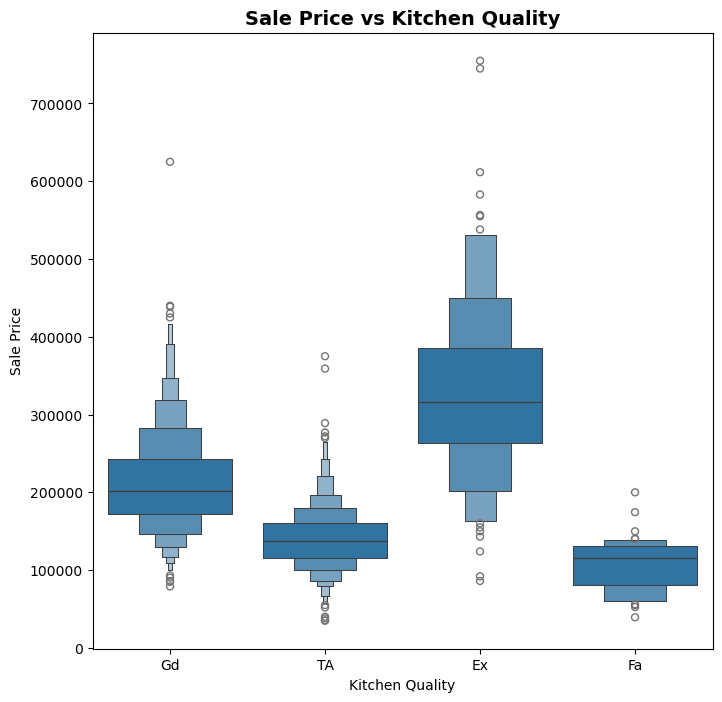

In [121]:
fig,ax = plt.subplots(figsize=(8,8))
sns.boxenplot(y='SalePrice',x='KitchenQual', data=df)
ax.set_xlabel('Kitchen Quality')
ax.set_ylabel('Sale Price')
ax.set_title('Sale Price vs Kitchen Quality', fontsize=14, fontweight='bold')

As expected, houses with higher kitchen quality have a much higher median sale price.
However, the variance is also large, which means this is not a strict rule — high kitchen quality often increases price, but not in every case.

---

## **Feature selection for the regression models**

For the modeling phase, I will keep all available features (except for categories removed due to very low frequency) when training the following models:

- Linear Regression (LR)
- Lasso (L1)
- Ridge (L2)
- Elastic Net

The goal is **not to manually select features**, but to let the regularization methods
handle:

- redundant or weakly informative variables (through coefficient shrinkage),
- multicollinearity between predictors,
- the bias–variance trade-off (control of overfitting).

We need to split the features in 3 different types : numerical features, categorical nominal features and categorical ordinal features. This is essential for scaling the preprocessing (scaling and encoding).

I first check my categorical variables to make sure that no numerical variable has been converted into an ‘object’ type :

In [122]:
df.select_dtypes('object').columns.tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

I observe a problem: LotFrontage and GarageYrBlt are not categorical features, yet their type is object.
As explained earlier, when I replaced the missing values with 'None', I should have applied this only to features of type object, not to numerical features. By adding 'None' to GarageYrBlt and LotFrontage, they were automatically converted into object-type features.

I will now fix this issue by replacing 'None' with 0 and converting the type back to float.

In [203]:
df['LotFrontage'] = df['LotFrontage'].replace('None', 0).astype(float)
df['GarageYrBlt'] = df['GarageYrBlt'].replace('None', 0).astype(float)

Let's check know the float features :

In [124]:
float_ = df.select_dtypes('float')
float_

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


Perfect. No features missing and no features that shouldn’t be there.

In [125]:
int_ = df.select_dtypes('int')
int_col = int_.columns.tolist()
int_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LowQualFinSF_bin',
 'Has3SsnPorch',
 'HasPool']

Same. No features missingbBut there are features that are categorical (OverallQual for example) or binary (HasPool), so we will put them in the categorical features list

We can know split the features, starting by the numerical features :

In [126]:
num_col = df.select_dtypes(['int','float']).drop(['SalePrice','OverallQual','OverallCond','LowQualFinSF_bin','Has3SsnPorch','HasPool'], axis=1).columns.tolist()
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

We must know handle the hifhly right-skewed features by applying the log function (if skew is > 1). It will help us stabilizing the variance and reducing the impact of outliers.

In [127]:
skew_vals = df[num_col].skew().sort_values(ascending=False)
high_skew = skew_vals[skew_vals>1].index.tolist()
print(high_skew)
df[high_skew]=np.log1p(df[high_skew])

['MiscVal', 'LotArea', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass', '1stFlrSF', 'GrLivArea']


We know create a list of categorical features to analyze which features should be OneHotEncoded and which one should be OrdinalEncoded.

In [128]:
cat_col = df.drop(num_col, axis=1).drop('SalePrice', axis=1).columns.tolist()
cat_col

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'LowQualFinSF_bin',
 'Has3SsnPorch',
 'HasPool']

CentralAir is a binary feature so we will encode it manually then use the parameter 'drop = "if_binary"' in the OneHotEncoder to be sure it will only create one column for this feature :

In [205]:
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})

We select the ordinal features for the OrdinalEncoder and put them in a list. These are the features with an inherent order, such as quality ratings :

In [130]:
ord_col = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                        'KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence']

We define the parameter 'categories' of the OrdinalEncoder requires the different categories of each variable of ord_col :

In [131]:
ord_categories = [
    ['IR3','IR2','IR1','Reg'],
    ['Sev', 'Mod', 'Gtl'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['None','No','Mn', 'Av', 'Gd'],
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['None', 'Unf', 'RFn', 'Fin'],
    ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['N', 'P', 'Y'],
    ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
]   

Then we select the remaining features (the nominal features) and create a list for the OneHotEncoder :

In [132]:
nom_col = [c for c in cat_col if c not in ord_col]
nom_col

['MSZoning',
 'Alley',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'LowQualFinSF_bin',
 'Has3SsnPorch',
 'HasPool']

---

## **Preprocessing**

We create our independant features and our target. As we said earlier during the SalePrice distribution analysis, we will apply the log function to the targte in order to control its skewness to the right. We will not forget to apply the exponentiel fonction at the end to get the real predictions.

In [133]:
X = df.drop('SalePrice', axis=1)
Y = np.log1p(df['SalePrice'])

We split the set into a train set and a data set with a test size of 20% :

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Let's know create our preprocessor, by applying StandardScaler() to the numerical features, the OneHotEncoder to the nominal categorical features and the OrdinalEncoder to the ordinal categorical features. The 'remainder' parameter of the ColumnTransformer ensure that the features that aren't part of the lists are dropped.

In [135]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
ord_enc = OrdinalEncoder(categories=ord_categories)

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_col),
        ('ord', ord_enc, ord_col),
        ('ohe', ohe, nom_col)
    ],
    remainder='drop'
)

---

## **Model Development**

In this section, we develop four regression models: Linear Regression, Lasso, Ridge, and Elastic Net.
We use cross-validation to obtain more reliable performance estimates by evaluating each model on multiple train/test splits instead of relying on a single split. This helps reduce variance and gives a more robust measure of how the model generalizes.

For the three regularized models (Lasso, Ridge, and Elastic Net), we apply GridSearchCV to select the optimal hyperparameters. This ensures that each model is tuned to achieve the best possible performance.

Finally, we compute the cross-validated scores, as well as the R² and RMSE metrics on the test split to assess and compare model performance.

### Linear Regression

In [136]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)


pipe_lr = Pipeline(
    [
        ('processor', preprocessor),
        ('model', LinearRegression())
    ]
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipe_lr,
    X,Y,
    cv=cv,
    scoring = 'neg_root_mean_squared_error')

In [137]:
cv_score_lr = -scores.mean()
print(f'Linear Regression CV RMSE : {cv_score_lr}')

Linear Regression CV RMSE : 0.13655887038525788


In [138]:
pipe_lr.fit(X_train, Y_train)
y_pred_lr = np.expm1(pipe_lr.predict(X_test))
Y_test_real = np.expm1(Y_test)
rmse_test_lr = np.sqrt(mean_squared_error(np.expm1(Y_test), y_pred_lr))
r2_test_lr = r2_score(Y_test_real, y_pred_lr)
print(f'Linear Regression test RMSE : {rmse_test_lr}')
print(f'Linear Regression test R2 : {r2_test_lr}')

Linear Regression test RMSE : 26837.529090750035
Linear Regression test R2 : 0.9060987827320859


### Ridge Regression

We tune the Ridge model using a grid of α values: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000].
This grid spans several orders of magnitude, from almost no regularization (α close to 0) to very strong regularization (α = 100 or 1000).

It allows us to compare:

- weak penalties (α ≤ 0.1), similar to Linear Regression,

- moderate penalties (α ≈ 1–10),

- strong penalties (α ≥ 100), which heavily shrink the coefficients.
GridSearchCV selects α = 10 as the best value, which corresponds to a moderate regularization strength, giving a good trade-off between bias and variance. So I refined the search around this region. I then used a denser grid on a log scale which explores values between 0.5 and 50 :

In [139]:
pipe_ridge = Pipeline(
    [
        ('processor', preprocessor),
        ('model', Ridge())
    ]
)

#param_grid_ridge = {'model__alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]} and we found best alpha = 10

alphas = np.logspace(-0.3, 1.7, 20)  
param_grid_ridge = {'model__alpha' : alphas}
grid_ridge = GridSearchCV(pipe_ridge,
                          param_grid=param_grid_ridge,
                          cv=cv,
                          scoring='neg_root_mean_squared_error',
                          n_jobs=-1)

grid_ridge.fit(X_train, Y_train)
cv_score_ridge = grid_ridge.best_score_
print(f'Ridge best alpha : {grid_ridge.best_params_}')
print(f'Ridge best cv score : {cv_score_ridge}')

Ridge best alpha : {'model__alpha': np.float64(7.209327202223526)}
Ridge best cv score : -0.12835464085615317


Ridge CV log-RMSE best than LR 

In [140]:
best_ridge=grid_ridge.best_estimator_
y_pred_ridge = np.expm1(best_ridge.predict(X_test))
rmse_test_ridge = np.sqrt(mean_squared_error(Y_test_real, y_pred_ridge))
r2_test_ridge = r2_score(Y_test_real, y_pred_ridge)

print(f'Ridge test RMSE : {rmse_test_ridge}')
print(f'Ridge test R2 : {r2_test_ridge}')

Ridge test RMSE : 27577.56184284642
Ridge test R2 : 0.9008488170316138


Ridge test RMSE and R2 lower than LR, so Ridge better on the train set but lower on the test set

### Lasso Regression

For Lasso, I first tuned the model using a coarse grid of α values
[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5].
This grid spans small to moderately large penalties and allows us to see in which region Lasso performs best.
GridSearchCV selected α = 0.0005 as the best value.

To refine the search around this optimal value, I then built a narrower, more detailed grid which explores values in a small interval around 0.0005, giving a finer search for the best regularization strength for Lasso.

In [141]:
pipe_lasso = Pipeline(
    [
        ('processor', preprocessor),
        ('model', Lasso(max_iter=10000, random_state=42))
    ]
)

#param_grid_lasso = {'model__alpha' :[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]} and we found best alpha = 0.0005
best_alpha = 0.0005
alphas = np.linspace(best_alpha / 5, best_alpha * 5, 15)
param_grid_lasso = {'model__alpha' : alphas}


grid_lasso = GridSearchCV(pipe_lasso,
                          param_grid=param_grid_lasso,
                          cv=cv,
                          scoring='neg_root_mean_squared_error',
                          n_jobs=-1)

grid_lasso.fit(X_train, Y_train)
cv_score_lasso = grid_lasso.best_score_
print(f'Lasso best alpha : {grid_lasso.best_params_}')
print(f'Lasso best cv score : {cv_score_lasso}')

Lasso best alpha : {'model__alpha': np.float64(0.0006142857142857143)}
Lasso best cv score : -0.12603269104894393


In [142]:
best_lasso=grid_lasso.best_estimator_
y_pred_lasso = np.expm1(best_lasso.predict(X_test))
rmse_test_lasso = np.sqrt(mean_squared_error(Y_test_real, y_pred_lasso))
r2_test_lasso = r2_score(Y_test_real, y_pred_lasso)

print(f'Lasso test RMSE : {rmse_test_lasso}')
print(f'Lasso test R2 : {r2_test_lasso}')

Lasso test RMSE : 28562.199060630875
Lasso test R2 : 0.893642174642495


### Elastic Net

For Elastic Net, I first used a coarse grid of hyperparameters:
α ∈ [0.0001, 0.001, 0.01, 0.1, 1] and l1_ratio ∈ [0.1, 0.3, 0.5, 0.7, 0.9].
GridSearchCV selected α = 0.001 and l1_ratio = 0.5 as the best combination.

To refine the search around this optimum, I then built a narrower grid which explores α values in a small log-scaled range around 0.001 and focuses l1_ratio between 0.3 and 0.7, i.e. around 0.5, allowing a more precise search for the best balance between L1 and L2 regularization.

In [143]:
pipe_enet = Pipeline(
    [
        ('processor', preprocessor),
        ('model', ElasticNet(max_iter=10000, random_state=42))
    ]
)

#param_grid_enet = {'model__alpha' :[0.0001, 0.001, 0.01 ,0.1, 1],
                   #'model__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]} and we found best alpha = 0.001, best l1_ratio = 0.5

alpha_best=0.001
alphas = np.logspace(np.log10(alpha_best/3), np.log10(alpha_best*3), 10)

param_grid_enet = {'model__alpha' : alphas,
                   'model__l1_ratio' : np.linspace(0.3, 0.7, 9)}
grid_enet = GridSearchCV(pipe_enet,
                          param_grid=param_grid_enet,
                          cv=cv,
                          scoring='neg_root_mean_squared_error',
                          n_jobs=-1)

grid_enet.fit(X_train, Y_train)
cv_score_enet = grid_enet.best_score_
print(f'Elastic Net best alpha : {grid_enet.best_params_}')
print(f'Elastic Net best cv score : {cv_score_enet}')

Elastic Net best alpha : {'model__alpha': np.float64(0.0008850881520714598), 'model__l1_ratio': np.float64(0.7)}
Elastic Net best cv score : -0.12607797603392762


In [144]:
best_enet=grid_enet.best_estimator_
y_pred_enet = np.expm1(best_enet.predict(X_test))
rmse_test_enet = np.sqrt(mean_squared_error(Y_test_real, y_pred_enet))
r2_test_enet = r2_score(Y_test_real, y_pred_enet)

print(f'Elastic Net test RMSE : {rmse_test_enet}')
print(f'Elastic Net test R2 : {r2_test_enet}')

Elastic Net test RMSE : 28662.095011242265
Elastic Net test R2 : 0.8928969031768539


---

## **Evaluation of Model Performance**

### Metrics Comparison Accros Models

To begin, we create a summary table of the model metrics, including test RMSE, test R², and cross-validated log-RMSE :

In [186]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso", "Elastic Net"],
    "RMSE (Test)": [
        rmse_test_lr, rmse_test_ridge, rmse_test_lasso, rmse_test_enet
    ],
    "R2 (Test)": [
        r2_test_lr, r2_test_ridge, r2_test_lasso, r2_test_enet
    ],
    "CV log-RMSE (Best)": [
        -cv_score_lr, -cv_score_ridge, -cv_score_lasso, -cv_score_enet
    ]
})

results = results.set_index('Model')
results

,RMSE (Test),R2 (Test),CV log-RMSE (Best)
Model,,,
Linear Regression,26837.529091,0.906099,-0.136559
Ridge,27577.561843,0.900849,0.128355
Lasso,28562.199061,0.893642,0.126033
Elastic Net,28662.095011,0.892897,0.126078


Text(0.5, 0.01, 'Actual Values')

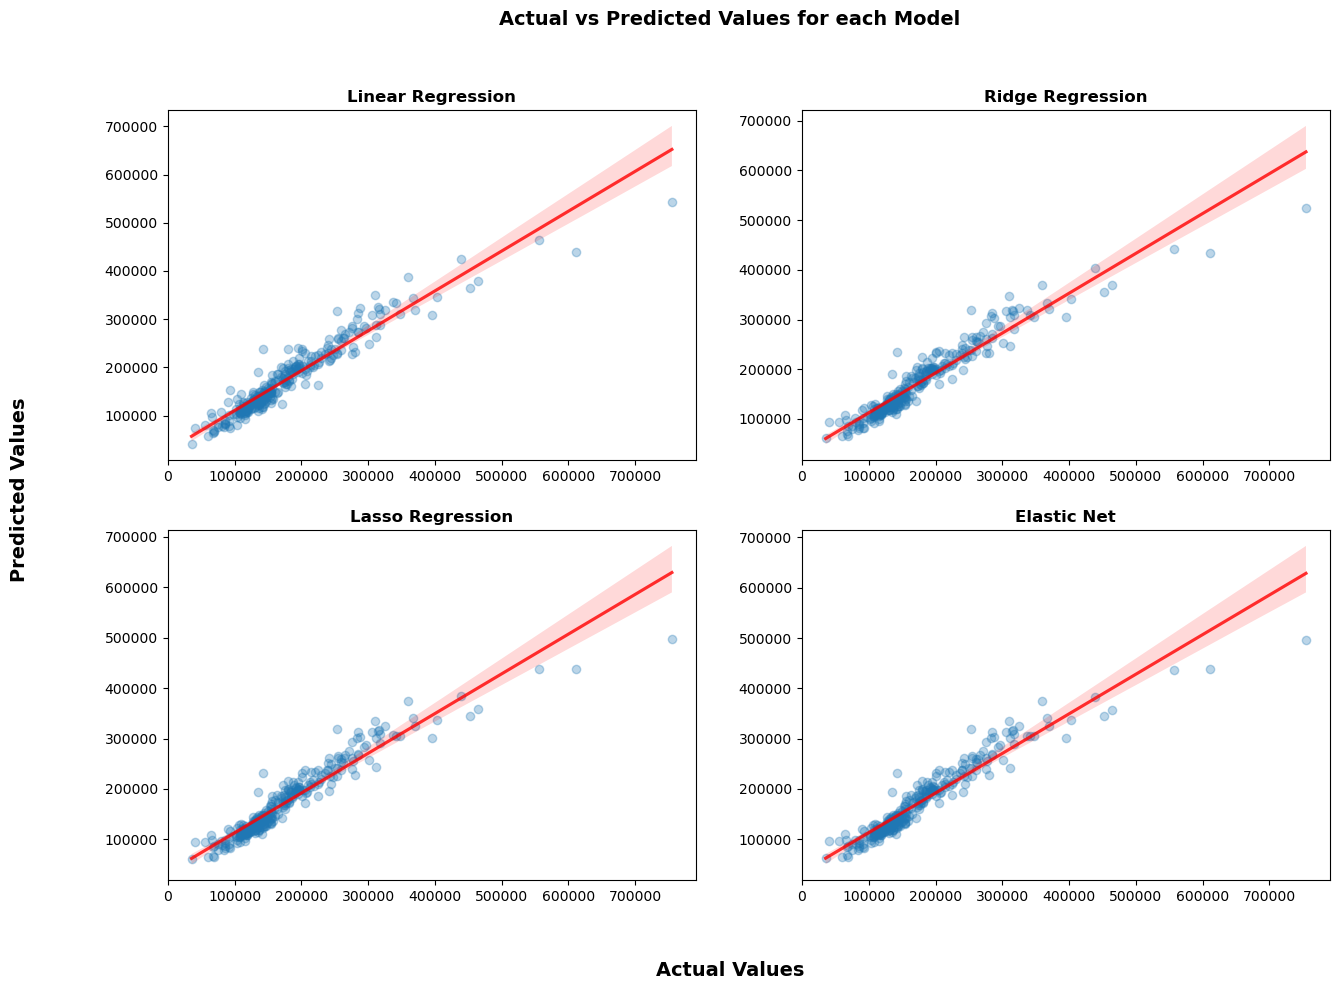

In [146]:
fig,axes = plt.subplots(2,2, figsize=(15,10))
for t,y, model in zip([(0,0),(0,1),(1,0),(1,1)],
                      [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_enet], 
                      ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net']) :
    sns.regplot(x = Y_test_real, y = y, scatter_kws={'alpha' : 0.3}, line_kws={'color' : 'red', 'alpha' : 0.8}, ax=axes[t])
    axes[t].set_title(model, fontsize=12, fontweight='bold')
    axes[t].set_xlabel('')
    axes[t].set_ylabel('')
    
fig.suptitle('Actual vs Predicted Values for each Model', fontsize=14, fontweight='bold')
fig.supylabel('Predicted Values', fontsize=14, fontweight='bold')
fig.supxlabel('Actual Values', fontsize=14, fontweight='bold')

Linear Regression shows the best performance in this comparison: it achieves the lowest test RMSE, the highest R², and the best cross-validated log-RMSE.
This means that, on this dataset, adding regularization does not immediately improve predictive accuracy or generalization.

The differences on the plots are not very visible because the three regularized models still achieve very good performance overall.

These results raise an important question for the project:
if Linear Regression already performs strongly, under what conditions does regularization become beneficial, and when does it start to degrade performance?

This will guide the interpretation of the next sections.

---

### Interpretation of Coefficients and Effect of Regularization

We can create a table of the coefficients of all features for each model. We create also the column 'abs_LR' and 'abs_lasso' to compare the coefficients of LinearRegression with the other models :

In [147]:
feature_names = preprocessor.get_feature_names_out()

In [148]:
coef_lr = pipe_lr.named_steps["model"].coef_
coef_ridge = best_ridge.named_steps["model"].coef_
coef_lasso = best_lasso.named_steps["model"].coef_

coef_df = pd.DataFrame({
    "feature": feature_names,
    "LinearRegression": coef_lr,
    "Ridge": coef_ridge,
    "Lasso": coef_lasso,
})

coef_df

,feature,LinearRegression,Ridge,Lasso
0,num__MSSubClass,-0.004279,-0.012854,-0.015472
1,num__LotFrontage,-0.009129,-0.009130,-0.007573
2,num__LotArea,0.038332,0.038247,0.036390
3,num__YearBuilt,0.056702,0.050251,0.050805
4,num__YearRemodAdd,0.015296,0.017402,0.019649
...,...,...,...,...
215,ohe__SaleCondition_Normal,-0.011522,0.003378,-0.000000
216,ohe__SaleCondition_Partial,-0.049816,0.001658,0.003321
217,ohe__LowQualFinSF_bin_1,0.020969,0.002428,0.000000
218,ohe__Has3SsnPorch_1,0.069400,0.041939,0.005043


In [185]:
coef_df["abs_LR"] = np.abs(coef_df["LinearRegression"])
coef_df.sort_values("abs_LR", ascending=False).head(20)

,feature,LinearRegression,Ridge,Lasso,abs_LR,abs_Lasso
188,ohe__Functional_Sev,-0.295620,-0.029810,-0.000000,0.295620,0.000000
48,ohe__MSZoning_C (all),-0.275699,-0.090054,-0.103932,0.275699,0.103932
120,ohe__OverallQual_9,0.235025,0.142855,0.179815,0.235025,0.179815
112,ohe__OverallQual_1,-0.225989,-0.043924,-0.000000,0.225989,0.000000
209,ohe__SaleType_Oth,0.220931,0.034926,0.000000,0.220931,0.000000
144,ohe__Exterior1st_ImStucc,-0.179682,-0.007486,-0.000000,0.179682,0.000000
121,ohe__OverallQual_10,0.173472,0.053106,0.037268,0.173472,0.037268
122,ohe__OverallCond_1,-0.151333,-0.025978,-0.000000,0.151333,0.000000
196,ohe__GarageType_None,-0.149158,0.005056,0.000000,0.149158,0.000000
124,ohe__OverallCond_3,-0.148452,-0.105436,-0.128231,0.148452,0.128231


- **Linear Regression**  
  The non-regularized model assigns relatively large positive or negative
  coefficients to several features (for example some levels of `OverallQual`,
  `Functional`, `MSZoning`, `Foundation`, etc.).  
  This indicates that the model relies heavily on a few correlated variables
  and is therefore more sensitive to noise and multicollinearity. Linear Regression can produce coefficients that change drastically when the data is modified or when small variations in multicollinearity occur. This instability increases variance, which can reduce the model’s ability to generalize well to new data.

- **Ridge Regression**  
  Ridge shrinks all coefficients towards zero while keeping a very similar
  structure to Linear Regression. Strong effects are systematically reduced
  (e.g. a coefficient of about 0.23 in Linear Regression becomes ~0.14 in Ridge).
  This shows that Ridge improves the **stability and robustness** of the model
  by limiting the influence of highly correlated features, even though the
  predictive performance on the test set is very close to the plain linear model.

- **Lasso Regression**  
  Lasso performs **automatic feature selection**: many coefficients become
  exactly zero and the model only keeps a subset of informative features.  
  This dramatically simplifies the model and improves **interpretability**,
  since it highlights the main drivers of house prices (overall quality,
  living area, some neighborhoods, presence of a pool, etc.) while discarding
  weaker or redundant signals.

- **Common important features**  
  Several variables remain important (non-zero and relatively large in absolute
  value) across all models, confirming their strong predictive power: overall
  quality (`OverallQual`), above-ground living area (`GrLivArea`), some
  neighborhood dummies, and a few condition/amenity indicators.

Overall, regularization does **not** significantly improve RMSE on this dataset,
but it clearly improves the **robustness, stability and interpretability** of
the model. Linear Regression provides the best raw test RMSE, while Ridge and
especially Lasso provide cleaner and more stable coefficient structures that are
better suited for interpretation and communication.

---


## **Business Interpretation of the Top Lasso Coefficients**

Lasso selects the most influential variables driving house prices by shrinking less relevant coefficients to zero. So we can use Lasso Regression for interpretation and Business Analysis.
The following features have the strongest positive impact on predicted sale price. They represent the key value drivers of residential property valuation in this dataset.

Let's analyze which features most impact House Prices :

---

In [150]:
print(f'Number of Coefficients different from 0 : {len(coef_df[coef_df['Lasso'] != 0].sort_values('Lasso', ascending=False))}')
print('The 15 Most significant Lasso Coefficients :')
coef_df['abs_Lasso'] = np.abs(coef_df['Lasso'])
best_lasso_coef = coef_df[coef_df['Lasso'] != 0].sort_values('abs_Lasso', ascending=False).head(15)
best_lasso_coef

Number of Coefficients different from 0 : 93
The 15 Most significant Lasso Coefficients :


,feature,LinearRegression,Ridge,Lasso,abs_LR,abs_Lasso
120,ohe__OverallQual_9,0.235025,0.142855,0.179815,0.235025,0.179815
124,ohe__OverallCond_3,-0.148452,-0.105436,-0.128231,0.148452,0.128231
12,num__GrLivArea,0.124109,0.111293,0.125670,0.124109,0.125670
114,ohe__OverallQual_3,-0.145110,-0.115539,-0.115153,0.145110,0.115153
48,ohe__MSZoning_C (all),-0.275699,-0.090054,-0.103932,0.275699,0.103932
189,ohe__Functional_Typ,0.145877,0.095249,0.102735,0.145877,0.102735
71,ohe__Neighborhood_Crawfor,0.085623,0.082176,0.099820,0.085623,0.099820
140,ohe__Exterior1st_BrkFace,0.094785,0.078925,0.096654,0.094785,0.096654
119,ohe__OverallQual_8,0.116254,0.072750,0.094105,0.116254,0.094105
87,ohe__Neighborhood_StoneBr,0.145146,0.091484,0.092540,0.145146,0.092540


With Lasso, the number of interpretable coefficients drops from 213 to 93.

We can clearly see the impact of regularization when comparing the coefficients of Linear Regression and Lasso. For example, the coefficient of ohe_MSZoning_C goes from about 0.275 with Linear Regression to about 0.10 with Lasso. This shows how Lasso reduces the influence of some predictors, shrinking many coefficients toward zero and keeping only the most relevant features with substantial weights.”

From a business perspective, this makes the model much easier to interpret: instead of analyzing more than 200 noisy or redundant coefficients, we focus on a smaller set of stable and meaningful drivers of price. Additionally, because Linear Regression is highly sensitive to multicollinearity, some of its coefficients may become unstable or inconsistent, making business interpretation less reliable. Lasso, by contrast, stabilizes the model by reducing variance and filtering out weak predictors—even though it introduces some bias—leading to clearer, more trustworthy insights

Let's know focus on the most significant Lasso coefficient and try to interpret them as a business analyst :

Text(0, 0.5, 'Coefficient Value')

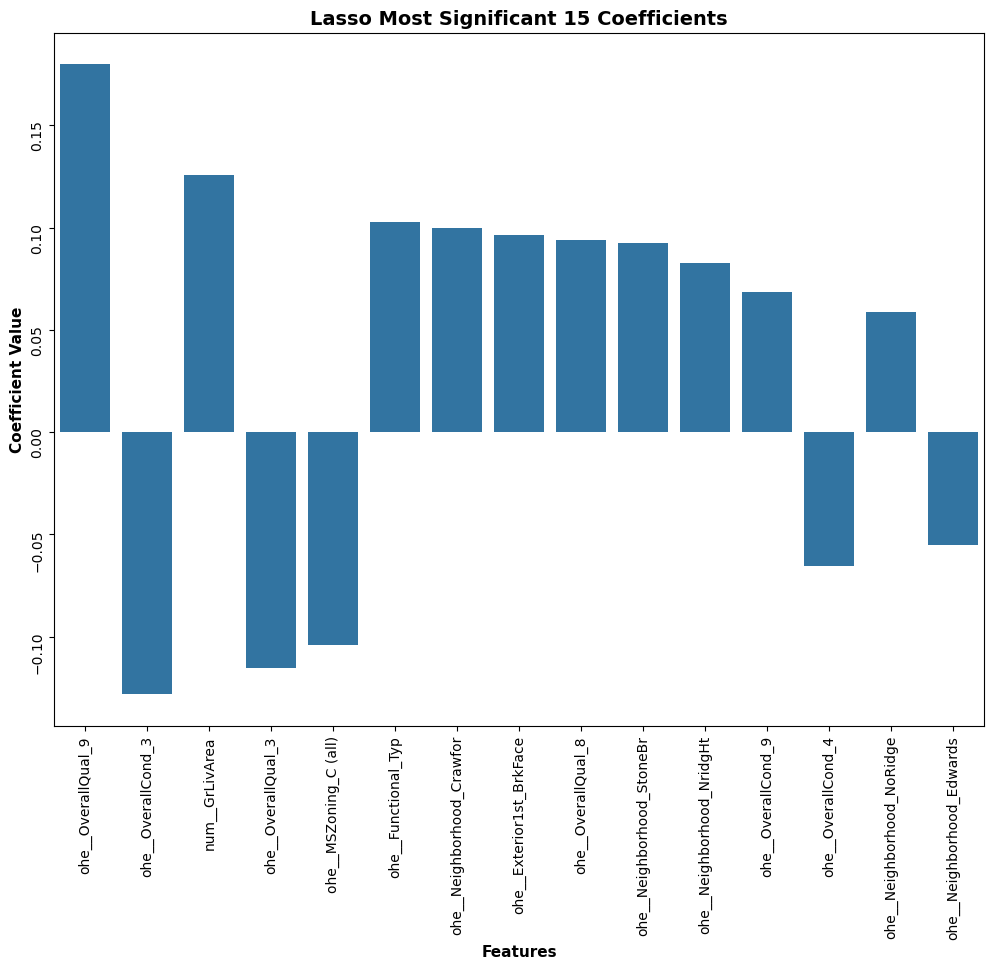

In [151]:
fig,ax = plt.subplots(figsize=(12,9))
sns.barplot(x='feature', y='Lasso', data=best_lasso_coef)
ax.tick_params(rotation=90)
ax.set_title('Lasso Most Significant 15 Coefficients', fontsize=14, fontweight='bold')
ax.set_xlabel('Features', fontsize=11, fontweight='bold')
ax.set_ylabel('Coefficient Value', fontsize=11, fontweight='bold')


#### **What increases the price (positive coefficients)**

##### **OverallQual_9 — Very high construction quality**
Homes with an overall quality rating of 9 experience a strong price increase. This reflects luxury materials, high-end finishes, and superior structural attributes.

##### **GrLivArea — Large above-ground living area**
Bigger living spaces significantly raise value. Usable above-ground area is one of the most powerful predictors of house price.

##### **Functional_Typ — No functional issues**
Homes without layout or functional deficiencies sell for more. A “typical” functional score signals full usability and no structural inconveniences.

##### **Neighborhood_Crawfor — Premium neighborhood**
Even controlling for size and quality, homes in Crawford carry a strong location premium. This reflects superior amenities and market desirability.

##### **Exterior1st_BrkFace — Brick façade**
Brick-facing exteriors add value, likely due to durability and aesthetic appeal.

##### **OverallQual_8 — High quality**
Quality level 8 also contributes to a substantial increase in price. High but non-luxury quality remains highly valued.

##### **Neighborhood_StoneBr — High-value location**
Stone Brook is another neighborhood where comparable homes sell for more, confirming the strong effect of local desirability.

##### **Neighborhood_NridgHt — Desirable area**
North Ridge Heights also shows a positive intrinsic effect on price, independent of house characteristics.

##### **OverallCond_9 — Excellent condition**
Homes with exceptional upkeep, minimal deterioration, and recent updates achieve higher sale prices.

##### **Neighborhood_NoRidge — Positive neighborhood effect**
NoRidge adds a moderate but clear price premium relative to the baseline neighborhood.

---

#### **What decreases the price (negative coefficients)

##### **OverallCond_4 — Below-average condition**
A condition rating of 4 indicates visible wear or maintenance needs, reducing the home's perceived value.

##### **OverallQual_3 — Low quality**
Inferior construction quality (rating 3) strongly decreases price. These properties often require renovation or use outdated materials.

##### **MSZoning_C (all) — Less desirable zoning**
Zoning category “C (all)” is associated with lower-value residential or mixed-use areas, which tends to reduce property value.

##### **Neighborhood_Edwards — Lower intrinsic location value**
After adjusting for house characteristics (size, quality, age), homes in Edwards sell for less than comparable homes elsewhere. This suggests weaker market desirability or fewer neighborhood amenities.

---

#### **Summary**
The strongest price increases come from **quality**, **living area**, **excellent condition**, and **premium neighborhoods**.  
The strongest price decreases come from **low quality**, **poor condition**, **undesirable zoning**, and **lower-value neighborhoods** such as Edwards.


---

### Why do Crawford and Edwards have such strong coefficients even though their median prices are not the highest or lowest?

It may seem surprising that the Lasso model assigns a very positive coefficient to Crawford and a strongly negative one to Edwards, while their median sale prices do not appear to be the best or the worst. This is because the model is not estimating neighborhoods based on their raw median price. Instead, it measures the *intrinsic effect* of each neighborhood on the sale price **after controlling for all other house characteristics** such as size, quality, condition, and year built.

In practice, this means that the coefficient represents how much a neighborhood increases or decreases the price **for two houses that are otherwise identical**. A neighborhood like Crawford may not have the highest median price, but when comparing houses with the same characteristics, properties located there still tend to sell for more, which explains the strong positive coefficient. Conversely, Edwards may not have the very lowest median price, but once the model adjusts for factors like house size or quality, it appears to have a negative intrinsic impact on value.

In short, median prices mix together house characteristics and location effects, while regression coefficients isolate the effect of location alone. This explains why Crawford and Edwards stand out in the model even though their raw medians do not.

---

## **Model Choice Summary**

### 1. Performance (Predictive Accuracy)
Linear Regression (OLS) is the best model in terms of pure predictive performance. It provides the lowest RMSE and the highest R² because it does not apply regularization, allowing it to fully capture the linear signal in the data. However, it is also the most sensitive to correlated features and small changes in the dataset.

### 2. Stability & Robustness (Model Reliability)
Ridge Regression provides the most stable and robust results. Thanks to L2 regularization, it reduces coefficient variance and handles multicollinearity effectively. Its predictions remain consistent even when features are added, removed, or slightly modified, and its performance remains very close to that of Linear Regression while offering much greater reliability.

### 3. Interpretability (Feature Understanding)
Lasso Regression is the best choice when interpretability is important. With L1 regularization, it forces many coefficients to zero and produces a sparse, simple model that highlights the truly important predictors. Although its predictive performance is slightly lower, it provides a much clearer understanding of which variables drive house prices.

---


## **Final Model Conclusion**

If the goal is **pure predictive performance**, then **Linear Regression** is the best choice.  

If the objective is to deploy a model that is **stable, robust, and generalizes reliably in production**, then **Ridge Regression** is the preferred option.  

If the priority is **interpretability and business understanding**, then **Lasso Regression** is the most appropriate model.  

---

## **Build a Strong Script for Model Deployment**

We want to build a pipeline that can process any new housing dataset and use our four models to predict house prices.

1. data_cleaning: handles missing values (median imputation for numerical features and 'None' for categorical features).

2. data_new_col: creates the new binary columns used as additional predictors.

3. skew_transform: applies log transformations to highly skewed features.

4. predict_on_test: combines the three previous steps, trains the four models, predicts the target values, and returns both a final dataframe of predictions and an augmented version of the input dataset with prediction columns appended at the end.

---

In [163]:
def data_cleaning(df):
    df = df.copy()
    
    # Colonnes numériques : on remplit par la médiane
    num_cols = df.select_dtypes(include=['float', 'int']).columns
    for col in num_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())
    
    # Colonnes catégorielles : on remplit par 'None'
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna('None')
    
    return df


In [164]:
def data_new_col(df) :
    df['LowQualFinSF_bin'] = (df['LowQualFinSF']>0).astype(int)
    df['Has3SsnPorch'] = (df['3SsnPorch']>0).astype(int)
    df['HasPool'] = (df['PoolArea']> 0).astype(int)
    df['CentralAir'] = df['CentralAir'].map({'N': 0, 'Y': 1, 'None': 0})
    return df

In [165]:
def skew_transform(df, high_skew):
    for col in high_skew:
        if col in df.columns:
            df[col] = np.log1p(df[col])

    return df    

When I first ran the pipeline, I got an error indicating that some ordinal features contained the category 'None', which caused the prediction step to fail. This happened because some ordinal variables had missing values, and during preprocessing a new category 'None' was implicitly created, even though it was not included in the categories parameter of the ordinal encoder.

To fix this, I added a condition in the final function: if an ordinal feature contains the category 'None', it is replaced by the mode of that feature before encoding. This ensures that all ordinal categories are known in advance and that the pipeline can run on any new dataset without raising errors.

In [184]:
def predict_on_test(df, high_skew):
    df_clean=data_cleaning(df)
    df_feat = data_new_col(df_clean)

    for col, cats in zip(ord_col, ord_categories):
        if 'None' not in cats and 'None' in df_feat[col].values:
            # replace 'None' by a valid level (e.g. the first category)
            df_feat[col] = df_feat[col].replace('None', df_feat[col].mode()[0])
    X_test = skew_transform(df_feat,high_skew)

    predictions = {}

    models_dict = {'Linear Regression' : pipe_lr,
                   'Ridge Regression' : best_ridge,
                   'Lasso Regression' : best_lasso,
                   'Elastic Net' : best_enet}
    
    for name, model in models_dict.items():
        y_pred_log = model.predict(X_test)
        y_pred = np.expm1(y_pred_log)
        predictions[name] = y_pred
        final_predictions = pd.DataFrame(predictions)
        df_final = pd.concat([df_test.reset_index(drop=True), final_predictions.reset_index(drop=True)], axis=1)


    return final_predictions, df_final

---

# **Test Set :**

Let's try to predict the Sale Prices of the Houses in the Test Set by using our 'predict_on_test' function :

In [171]:
df_test = pd.read_csv(r'C:\Users\Saker_Maiyar\Downloads\house-prices-advanced-regression-techniques\test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [182]:
final_predictions, df_final = predict_on_test(df_test, high_skew)
final_predictions

,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net
0,119692.133659,115879.393185,115186.211157,115123.230639
1,154139.308618,151426.217154,149516.885116,149533.414338
2,184588.017978,183932.124681,185755.091575,185860.840647
3,194209.211837,191164.379685,191973.960705,192038.413449
4,211773.671725,204796.718345,204903.007111,204516.820120
...,...,...,...,...
1454,60733.423581,77797.988037,84232.740324,84315.626446
1455,85638.203878,83793.064964,88121.743466,88211.922056
1456,161392.687591,160476.228535,160893.696457,160951.794822
1457,89650.157143,110205.150893,113053.754845,113103.457042


In [183]:
df_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2010,WD,Normal,119692.133659,115879.393185,115186.211157,115123.230639
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,Gar2,12500,6,2010,WD,Normal,154139.308618,151426.217154,149516.885116,149533.414338
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,3,2010,WD,Normal,184588.017978,183932.124681,185755.091575,185860.840647
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,6,2010,WD,Normal,194209.211837,191164.379685,191973.960705,192038.413449
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,0,1,2010,WD,Normal,211773.671725,204796.718345,204903.007111,204516.820120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,60733.423581,77797.988037,84232.740324,84315.626446
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2006,WD,Abnorml,85638.203878,83793.064964,88121.743466,88211.922056
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2006,WD,Abnorml,161392.687591,160476.228535,160893.696457,160951.794822
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,89650.157143,110205.150893,113053.754845,113103.457042


---

## **Conclusion and Project Feedback**

Working with such a rich and diverse dataset was extremely insightful. It required a significant amount of time to examine each feature, understand its meaning, determine its correct type, assess whether it should be kept, and select the right encoding strategy. One of the main challenges was that even a small modification to a single feature—such as changing its type, removing it, or introducing an unexpected value—could affect the entire workflow. For example, adding 'None' to numerical features or encountering missing values in the new dataset changed the list of ordinal categories and led to errors during prediction. This highlighted the importance of data consistency and careful preprocessing when building robust pipelines.

For categorical variables, I explored different types of visualizations, but the range of suitable plots is naturally limited for this kind of data. As a result, some analyses—especially boxplots—can feel repetitive. Despite this, the exploration remained valuable for understanding how each category influences the target.

This project also helped me better understand the role of regularization and how each method (Lasso, Ridge, Elastic Net) affects the model. I initially expected multicollinearity to degrade the performance of a standard Linear Regression more significantly, which was not the case here. Instead, what clearly emerged was the distinction between pure predictive performance, robustness, and interpretability. Linear Regression performed very well in terms of accuracy, but regularized models offered additional benefits such as coefficient stability and feature selection.

Perhaps the most important takeaway is that there is no single “best” model for every situation. Depending on the objective—maximizing performance, improving stability, mitigating multicollinearity, or enhancing interpretability—different models may be preferable. Being able to compare them side-by-side made these trade-offs much clearer.

Overall, this project provided a comprehensive hands-on experience across the entire ML pipeline: data cleaning, feature engineering, visualization, regularization, cross-validation, and model evaluation. It reinforced how crucial it is to combine technical performance with a thoughtful understanding of the data and the business context.

---

## **Thank You !**

### Maiyar SAKER